In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

In [103]:
def quarentine(d):
    return np.exp(-0.0*d)

#run Simulation
def SIR_sim(S0, I0, SPDPP, RPDPP):
    #Initialize
    S=S0
    I=I0
    R=0
    
    Strains=[10]
    d_end=200
    eventList=[1,2,3]

    S_d=[0 for i in range(0,d_end)]
    I_d=[0 for i in range(0,d_end)]
    R_d=[0 for i in range(0,d_end)]
    
    
    Strains_d=[[0 for i in range(0,d_end)]]

    #SIR Loop

    print("Running", end =" ")
    for d in range(1,d_end):
        stepsperday=100*int((SPDPP*S*I +RPDPP*I))+1
        #print("steps per day", stepsperday)

        spreadrate= (SPDPP/stepsperday)*quarentine(d)
        recrate=RPDPP/stepsperday

        #print(".", end =" ")
        print("Population of each Strain")
        print(Strains, len(Strains_d))
        for step in range(0,stepsperday):
            spreadprob=spreadrate*S*I
            recprob=recrate*I
            probevent=[1-spreadprob-recprob,spreadprob,recprob]
            #Error Catching
            if probevent[0]<0:
                print("negative prob! on day",d ," step ", step, ": ", probevent[0])
                print(S, I, R)
                break;

            event=random.choices(eventList,probevent)[0]
            if event==1:
                S=S
            elif event==2:
                S=S-1
                I=I+1
                if random.random()<0.999:
                    s_id=rand_strain(Strains)
                    Strains[s_id]=Strains[s_id]+1
                else:
                    Strains.append(1)
                    empty=[0 for i in range(0,d_end)]
                    Strains_d.append(empty)
                ##call mutation roller
            elif event==3:
                I=I-1
                R=R+1
                s_id=rand_strain(Strains)
                Strains[s_id]=Strains[s_id]-1
            
        #Record Values at end of day        
        S_d[d]=S
        I_d[d]=I
        R_d[d]=R
        for s, SS in enumerate(Strains):
            Strains_d[s][d]=Strains[s]

        #If all recovered, end simulation
        if R + S == S0+I0:
            d_end=d
            print("\rPandemic Ends on day",d)
            break
            
    print("\r----Final :",S,I,R)
    print(Strains)
    l=len(Strains_d)
    for s in range(0,l):
        plt.plot(range(0,d_end-1),Strains_d[s][0:d_end-1])
    
    return S_d,I_d,R_d,d_end   

def rand_strain(strains):
    I_tot=sum(strains)
    strain_id=range(0,len(strains))
    prob_id= strains.copy()
    for p in prob_id:
        p=p/I_tot
    chosen=random.choices(strain_id, prob_id)[0]
    #print(chosen,end="")
    return chosen


Running Population of each Strain
[10] 1
Population of each Strain
[29] 1
Population of each Strain
[63, 1] 2
Population of each Strain
[145, 2] 2
Population of each Strain
[322, 5] 2
Population of each Strain
[755, 10, 2] 3
Population of each Strain
[1625, 21, 2] 3
Population of each Strain
[3181, 38, 3, 2, 1, 1] 6
Population of each Strain
[5062, 68, 6, 4, 3, 1, 4, 1, 2] 9
Population of each Strain
[6529, 95, 4, 5, 3, 0, 4, 1, 5, 1, 1] 11
Population of each Strain
[7238, 106, 4, 4, 4, 0, 3, 1, 5, 1, 1, 1] 12
Population of each Strain
[7281, 108, 4, 4, 5, 0, 5, 1, 4, 1, 1, 2] 12
Population of each Strain
[7016, 102, 4, 4, 4, 0, 4, 1, 4, 1, 1, 2] 12
Population of each Strain
[6705, 102, 4, 4, 3, 0, 3, 1, 4, 1, 1, 2] 12
Population of each Strain
[6309, 98, 4, 4, 2, 0, 3, 1, 4, 1, 1, 2] 12
Population of each Strain
[5894, 90, 3, 4, 2, 0, 3, 1, 4, 1, 1, 2] 12
Population of each Strain
[5492, 82, 3, 4, 2, 0, 3, 0, 4, 1, 1, 1] 12
Population of each Strain
[5132, 77, 3, 4, 2, 0, 3, 0, 4, 1, 

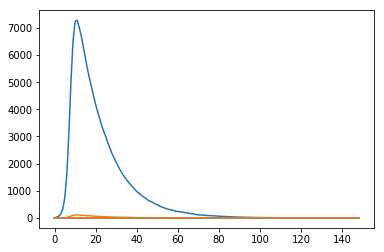

In [104]:
sims=1
maxdays=2000


Strains=[10]
Strains_d=[[0 for i in range(0,2000)]]

S_traj=[[0 for i in range(0,maxdays)] for j in range(0, sims)] 
I_traj=[[0 for i in range(0,maxdays)] for j in range(0, sims)] 
R_traj=[[0 for i in range(0,maxdays)] for j in range(0, sims)]
daycount=[0 for j in range(0, sims)]

for s in range(0,sims):
    S_traj[s], I_traj[s], R_traj[s],daycount[s]=SIR_sim(10000,10,0.0001, 1/14)
    
    
last_day=max(daycount)
print(last_day)




1
[10]


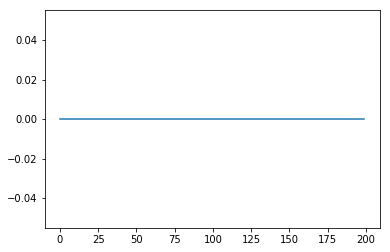

In [101]:
print(len(Strains_d))
print(Strains)
plt.plot(range(0,last_day),Strains_d[0][0:last_day])

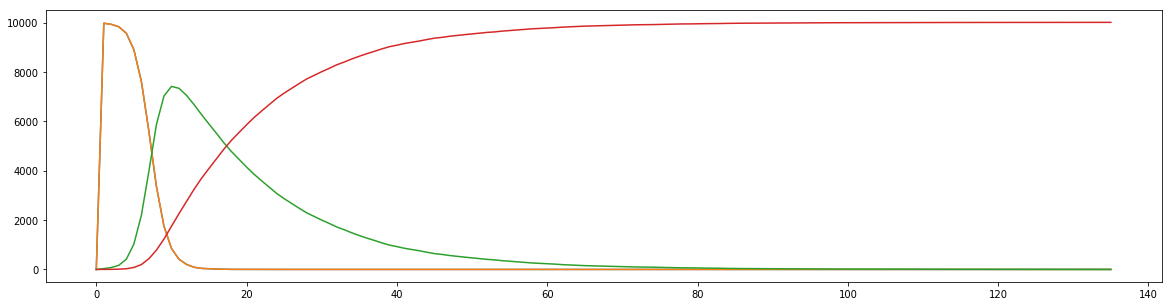

In [98]:
last_day=min(daycount)
plt.figure(figsize = (20,5));
for ii in S_traj:
    
    plt.plot(range(0,last_day),ii[0:last_day])

    
meanS= [sum(col) / float(len(col)) for col in zip(*S_traj)]
meanI= [sum(col) / float(len(col)) for col in zip(*I_traj)]
meanR= [sum(col) / float(len(col)) for col in zip(*R_traj)]


plt.plot(range(0,last_day),meanS[0:last_day])
plt.plot(range(0,last_day),meanI[0:last_day])
plt.plot(range(0,last_day),meanR[0:last_day])


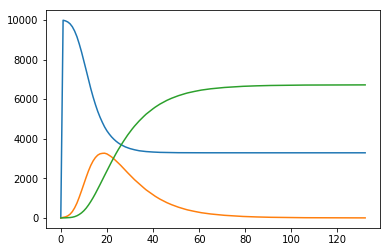

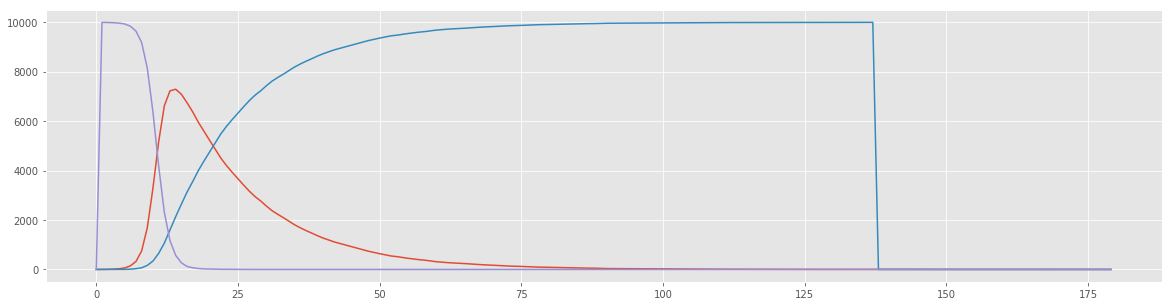

In [261]:
S_final=S_d[:d_end]
I_final=I_d[:d_end]
R_final=R_d[:d_end]

plt.style.use('ggplot');
plt.figure(figsize = (20,5));

plt.plot(I_final)
plt.plot(R_final)
plt.plot(S_final)





In [ ]:
m

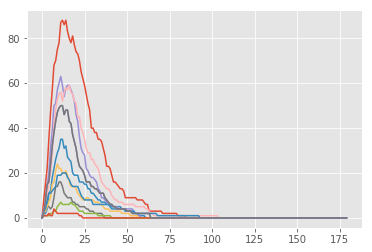

In [1]:
sum([1,2,3])

6

In [46]:
Strains

NameError: name 'Strains' is not defined